# Regression Using Artificial Neural Networks!!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()

In [3]:
##oops This Dataset has Large No.of Features Let's Read the DataFrame
df=pd.read_csv("../DATA/kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21597, 21)

oops it's a quite Large Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [12]:
#Here Price is our Target Column Let's Explore the distrubution of Price Feature
df['price'].iplot(kind='histogram',title='Distrubution of Price',xTitle='Price',bins=40)

It's Clear that Most of the House price is Less than 2Million and There are very Few houses That Are Greater than 3M 

In [15]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Great We dont need to deal with Missing Values Here!

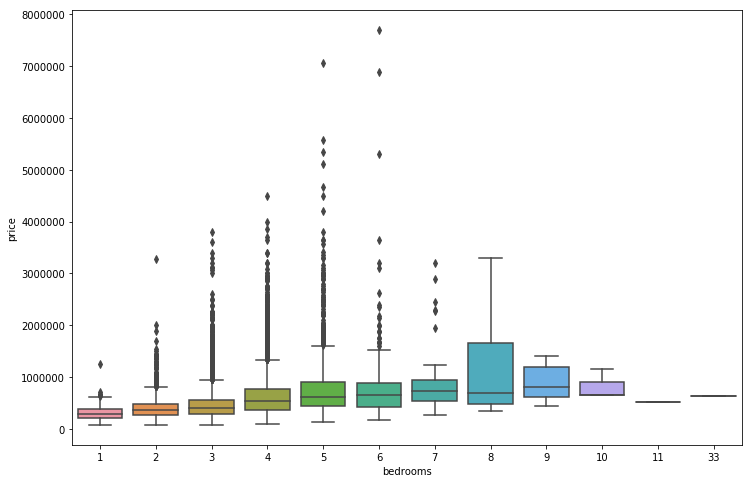

In [22]:
#Let's Explore the Price of the House Based on the Number of Bedroom
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

In [23]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
#Though above boxplot Does'nt Convey Much Meaning Let's Do it in Other Way
df.groupby('bedrooms').mean()['price']

bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

Above Gives The Average Price of the Different BedRoom Houses

In [39]:
#let's Explore the Price of the Houses With Respect to Lattitude
df.iplot(kind='scatter',x='price',y='lat',xTitle='Price',yTitle='Latitude of Different Locations',mode='lines+markers',dash='dot')

We Found That Most of the High Price Houses are in Particular Latitude This Might Due to Many Reasons,It can be River Side BasicallyOur Dataset is based on Seattle Housing Price

Lets Explore The long vs lat and hue as Price

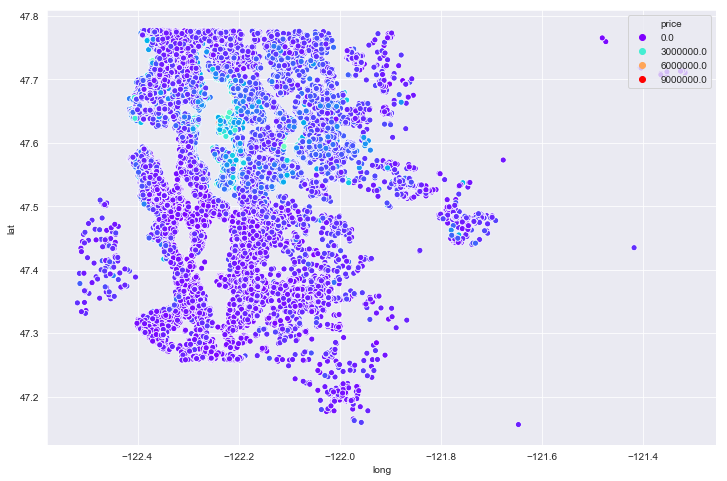

In [50]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(data=df,x='long',y='lat',hue='price',palette='rainbow')
plt.legend(loc='upper right')

Most of the Houses in lat=47.6 to 47.7 and long=-122.2 is of High Price This can be Due to River Side or anything Else!!

In [55]:
#Our Data Consists of Few Data points of Price > 4M so Lets Make our Model that Predits the Price of the Houses Less than 4M
df.sort_values(by='price',ascending=False)['price'][:10]

7245    7700000.0
3910    7060000.0
9245    6890000.0
4407    5570000.0
1446    5350000.0
1313    5300000.0
1162    5110000.0
8085    4670000.0
2624    4500000.0
8629    4490000.0
Name: price, dtype: float64

In [64]:
#Approximately 10% of the data is going to be removed and let's create a new df
df.shape[0]

21597

In [61]:
non_df=pd.DataFrame(df.sort_values(by='price',ascending=False)[216:])

In [62]:
non_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


In [63]:
non_df.shape

(21381, 21)

# Feature Engineering

In [65]:
#id column is of no Use Let's Remove it
non_df.drop('id',axis=1,inplace=True)

In [66]:
non_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


In [81]:
#We can Create Substantial Information From Date Feature Like Month and Year
non_df['date']=pd.to_datetime(non_df['date'])
non_df['date'][0]
#Now its Converted to Time Stamp From String Type

Timestamp('2014-10-13 00:00:00')

In [84]:
#Lets Extract Month and Year From Date
non_df['Month']=non_df['date'].apply(lambda month:month.month)
non_df['Year']=non_df['date'].apply(lambda year:year.year)

In [85]:
#let's Explore
non_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,760,2003,0,98004,47.5876,-122.204,2960,10347,6,2014
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,10,2014
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2,2015
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,4,2015
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,4,2015


In [86]:
#Now let's Drop Original Date Column
non_df.drop('date',axis=1,inplace=True)

In [87]:
non_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,...,760,2003,0,98004,47.5876,-122.204,2960,10347,6,2014


In [99]:
#Now Let's Explore the Price of House Vs Year
df.groupby('Year').mean()['price'].iplot(title='YEAR VS AVG.PRICE',xTitle='Year',yTitle='Price')

Its Quiet Obvious that As the year goes Price of the Houses Increases

In [105]:
#Let's Drop the Zipcode Column
non_df.drop('zipcode',axis=1,inplace=True)

In [106]:
non_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Month,Year
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,6,2014


# Pre Processing

In [112]:
X=non_df.drop('price',axis=1)
y=non_df['price']

Lets Split the Data Into Train Test Split

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

We Need To Scale our Data Before We Feed into Our Model So let's Do it

In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [125]:
#Now our Entire Data Set is Scaled Using Standerd Scaler Let's Print this
scaled_df=pd.DataFrame(X_train)
scaled_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.676239,-0.794120,-0.810811,-0.167956,-0.905182,-0.069528,-0.294855,0.901494,-0.54607,-0.520636,-0.665552,-0.402989,-0.206303,0.153391,0.129735,-0.054847,-0.164745,0.137392,-0.690831
1,-0.392461,-1.461544,-0.717633,-0.283557,-0.905182,-0.069528,-0.294855,-0.630094,-0.54607,-0.990096,0.382352,-0.812037,-0.206303,0.918134,-0.864142,-0.775352,-0.296428,1.425748,-0.690831


# ANN Model